# pandas

[pandas](https://pandas.pydata.org/) is an open source library for tabular heterogeneous data manipulation. The core structures are `Series` and `DataFrame` which can be seen as a collection of Series.  In addition `pandas` provides the necessary means for data cleaning and preparation. `pandas` uses NumPy array structure  as an extension type with methods for conversion in both directions.

&#9888; A major difference between numpy arrays and `pandas` Series and DataFrame is in the way that <tt>pandas</tt> indices are used. In NumPy the index is implicitly assigned $0..(n-1)$ whereas `pandas` Series and DataFrame have similar behaviour but in addition allow labels as indices. In addition the indices are preserved after applying operations.

Many parallels can be drawn between <tt>pandas</tt> and `tidyverse` R package. In terms of data structure, Series and DataFrame can be viewed as vectors and data.frame/tibble respectively. Furthermore, in terms of functionality most data manipulation operations available in tidyverse have a counterparts in <tt>pandas</tt>.


In [2]:
# convention
import pandas as pd
import numpy as np
#
from numpy.random import default_rng
rng = default_rng()
rng

Generator(PCG64) at 0x118667BC0

## Series

`Series` is a sequence of values, possibly of heterogeneous types. You can create Series with the <tt>pd.Series</tt> function.

**Synopsis: &nbsp; &nbsp;**<tt>Series(data=None, index=None, dtype=None, name=None, copy=False)</tt>
 - data: array, iterable, dict, scalar
 - index: 1-dimensional array, otherwise $0..(n-1)$
 - dtype: [data types](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes), otherwise inferred
 - name: optional
 - copy: default False, data is not copied but is a reference

In [3]:
s1 = pd.Series([3,5,7])
s2 = pd.Series({'a':3, 'b':5, 'c':7})
s = pd.Series([3,5,7], index=['a','b','c'])
s = pd.Series([3,5,7])
print(s1)
print(s2)
print(s)

0    3
1    5
2    7
dtype: int64
a    3
b    5
c    7
dtype: int64
0    3
1    5
2    7
dtype: int64


In [7]:
d={'a':3,'b':5,'c':7}
s=pd.Series(d)
print(d)
print(s)
type(d)

{'a': 3, 'b': 5, 'c': 7}
a    3
b    5
c    7
dtype: int64


dict

Input data to pd.Series is not copied by default. In the following scenario an update to Series `s` propogates to NumPy array `arr`:

In [9]:
arr = np.array(range(3,7+1,2)) # NumPy array [3,7] with step=2
s = pd.Series(arr, copy=False) # default copy=False 修改Series会影响原始数组
s = pd.Series(arr, copy=True)
s[1] = -1                      # set value s[1] to -1
s

0    3
1   -1
2    7
dtype: int64

Series, besides the ordered indices $0..(n-1)$, may also be viewed as a dictionary where values are accessed based on mapped indices to values:

In [11]:
s = pd.Series({'a':3, 'b':5, 'c':7})
s[1] == s['b']
s

/var/folders/j8/1q6nb0tj3nq7zyskshyj9bq80000gn/T/ipykernel_2308/1282276746.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[1] == s['b']


a    3
b    5
c    7
dtype: int64

Operations between Series are carried out based on matching indices as opposed to element-wise:

In [43]:
s1 = pd.Series({'a':3, 'b':5, 'c':2})
s2 = pd.Series({'b':3, 'a':5, 'c':2})
s1+s2

a    8
b    8
c    4
dtype: int64

and they don't have to be the same size:

In [44]:
s3 = pd.Series({'b':3, 'a':5, 'c':2, 'd':10}) # there is no matching 'd' in s1 therefore d=NaN
s1+s3

a    8.0
b    8.0
c    4.0
d    NaN
dtype: float64

Index membership:

In [45]:
"b" in s1 # s1 : {'a':3, 'b':5, 'c':2}

True

In contrast to NumPy arrays, and R vectors, being homogenous containers, Series may take up values of different types:

In [12]:
s = pd.Series({'a':3, 'b':5, 'c':'7'})
s.dtype
[type(v) for v in s]

[int, int, str]

## Series methods and submodules

An exhaustive review of [Series' methods and submodules](https://pandas.pydata.org/docs/reference/series.html#) is beyond the scope of this course. Here we only review several common uses.



In [14]:
s1 = pd.Series(['apple', 'watermelon', 'orange', 'pear', 'cherry', 'strawberry'],
               index=list("abcdef"))
s1


a         apple
b    watermelon
c        orange
d          pear
e        cherry
f    strawberry
dtype: object

In [15]:
s2 = pd.Series(['apple', 'kiwi', 'orange', 'pear', 'cherry', 'grape'],
               index=list("abcdef"))
s2


a     apple
b      kiwi
c    orange
d      pear
e    cherry
f     grape
dtype: object

In [21]:
s3 = pd.Series(np.log(np.arange(0.1,10,.1)), index=np.arange(0.1,10,.1))
s3

0.1   -2.302585
0.2   -1.609438
0.3   -1.203973
0.4   -0.916291
0.5   -0.693147
         ...   
9.5    2.251292
9.6    2.261763
9.7    2.272126
9.8    2.282382
9.9    2.292535
Length: 99, dtype: float64

In [17]:
s4 = np.array([""])
s4


array([''], dtype='<U1')

In [18]:
s1.unique()

array(['apple', 'watermelon', 'orange', 'pear', 'cherry', 'strawberry'],
      dtype=object)

In [49]:
s1.count()

6

In [19]:
s1.compare(s2)

,self,other
b,watermelon,kiwi
f,strawberry,grape


In [51]:
s1.filter(['a','b'])

a         apple
b    watermelon
dtype: object

<Axes: >

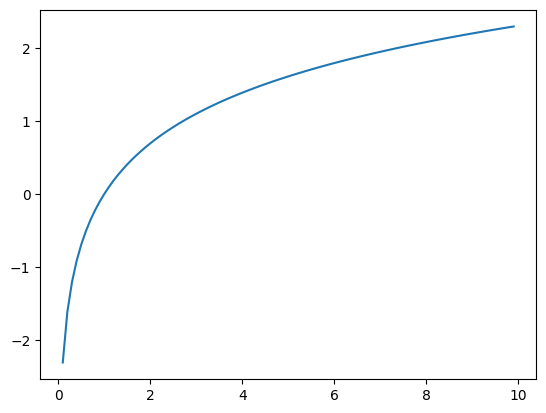

In [52]:
s3.plot()

In [53]:
s1.drop(['b','f'])

a     apple
c    orange
d      pear
e    cherry
dtype: object

In [20]:
s3.apply(lambda x: np.abs(x)) #将s3中的值转换为绝对值

0.1    2.302585
0.2    1.609438
0.3    1.203973
0.4    0.916291
0.5    0.693147
         ...   
9.5    2.251292
9.6    2.261763
9.7    2.272126
9.8    2.282382
9.9    2.292535
Length: 99, dtype: float64

## Timestamp

In [23]:
dates = pd.Series(['1-4-1988', '1-1-1987', '1-12-2011', '1-6-2005', '1-5-2005'])
tss = pd.to_datetime(dates,format="%d-%m-%Y")
print(tss)
print(tss.min(), tss.max())
tss.sort_values()

0   1988-04-01
1   1987-01-01
2   2011-12-01
3   2005-06-01
4   2005-05-01
dtype: datetime64[ns]
1987-01-01 00:00:00 2011-12-01 00:00:00


1   1987-01-01
0   1988-04-01
4   2005-05-01
3   2005-06-01
2   2011-12-01
dtype: datetime64[ns]

# DataFrame

The pandas' DataFrame is a 2-dimensional structure which may be viewed as a collection of Series. It has indices for both dimensions. We will use the terms observations and variables for rows and columns interchangeably. DataFrame, and Series, can hold dimensions $>2$ with the so called `hierarchical indexing` which is beyond the scope of this course.

&#9888; We will be working with homogeneous Series in the context of DataFrames.

To create a DataFrame use the function pd.DataFrame:

**Synopsis: &nbsp; &nbsp;**<tt>DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)</tt>

Most arguments are familiar from pd.Series except the additional *columns* with which the indices of the second dimension are controlled.


In [24]:
df = pd.DataFrame  (data=[[3,'a'], [5,'b'], [7,'c']],                    # list, tuple, or np.array
                    columns=['x', 'y']) 
df 

,x,y
0,3,a
1,5,b
2,7,c


In [25]:
df = pd.DataFrame({'x': [3,5,7], 'y': ['a','b','c']})                    # dictionary of columns
df

,x,y
0,3,a
1,5,b
2,7,c


In [58]:
df = pd.DataFrame({3:'a', 5:'b', 7: 'c'}.items(), columns= ['x','y'])    # dictionary of rows
df

,x,y
0,3,a
1,5,b
2,7,c


## DataFrame : read/write

You may want to store or share with others the DataFrame you just created. The most common data format to store a DataFrame is comma-separated-values (csv) format. Use `to_csv` method to export a DataFrame and `pd.read_csv` import:

In [3]:
df = pd.DataFrame({'x': rng.standard_normal(10), 'y': rng.standard_normal(10)})
df.to_csv("df.csv",index=False)   # write df to file 'df.csv', do not include index
df = pd.read_csv("df.csv")        # read df.csv into df object
df

,x,y
0,1.885111,-0.478513
1,1.638883,1.083724
2,0.299923,-0.377342
3,-0.561576,-3.268135
4,1.153908,-1.841846
5,-1.022296,-0.382125
6,2.431503,-0.909756
7,-1.667129,1.313596
8,-1.172211,-1.069700
9,0.881010,-1.079573


## Inspect content

In [60]:
df = pd.DataFrame({'x': rng.standard_normal(10), 'y': rng.standard_normal(10)}) # x and y two random variables

df.head()                   # top 5 (default) observation
df.tail(2)                  # last 2 observations
df.head(5).tail(2)          # composition
df.shape                    # size of the dimensions
df.size                     # total number of elements
df.columns                  # the columns indices/names
df.dtypes                   # listing of all columns' types
df.describe()               # descriptive summary of all variables

,x,y
count,10.000000,10.000000
mean,-0.212970,0.128983
std,1.103538,0.528437
min,-1.761185,-0.780521
25%,-0.765697,-0.180371
50%,-0.190300,0.132785
75%,0.224848,0.454259
max,2.059707,0.831049


## Select columns

### Single column

You can select a column from a DataFrame using the square bracket `df["column_name"]` or `df.column_name`. When only one column name is given the result is a Series, with a list of columns the result is a DataFrame:

In [5]:
df["x"]   # Series


0    1.885111
1    1.638883
2    0.299923
3   -0.561576
4    1.153908
5   -1.022296
6    2.431503
7   -1.667129
8   -1.172211
9    0.881010
Name: x, dtype: float64

In [6]:
df.x      # <=>  df["x"]


0    1.885111
1    1.638883
2    0.299923
3   -0.561576
4    1.153908
5   -1.022296
6    2.431503
7   -1.667129
8   -1.172211
9    0.881010
Name: x, dtype: float64

In [7]:
df[["x"]] # DataFrame

,x
0,1.885111
1,1.638883
2,0.299923
3,-0.561576
4,1.153908
5,-1.022296
6,2.431503
7,-1.667129
8,-1.172211
9,0.881010


Only `valid python names` can be accessed through dot `.`:

In [9]:
pd.DataFrame({'valid_name': [1,2,3], 'another variable':[3,2,1]  }).valid_name

0    1
1    2
2    3
Name: valid_name, dtype: int64

### Multiple columns

Use a list of indices to select multiple columns:

In [10]:
df[['x', 'y']]  # explicit


,x,y
0,1.885111,-0.478513
1,1.638883,1.083724
2,0.299923,-0.377342
3,-0.561576,-3.268135
4,1.153908,-1.841846
5,-1.022296,-0.382125
6,2.431503,-0.909756
7,-1.667129,1.313596
8,-1.172211,-1.069700
9,0.881010,-1.079573


In [11]:
df[df.columns[[0,1]]]             # use indices on df.columns

,x,y
0,1.885111,-0.478513
1,1.638883,1.083724
2,0.299923,-0.377342
3,-0.561576,-3.268135
4,1.153908,-1.841846
5,-1.022296,-0.382125
6,2.431503,-0.909756
7,-1.667129,1.313596
8,-1.172211,-1.069700
9,0.881010,-1.079573


## Select rows

### Using logical criteria

Similar to NumPy logical masks we can filter out rows for which the logical condition succeeds. A condition on the variables of a DataFrame returns a logical value for each row in a format of a `Series` object:

In [64]:
df = pd.DataFrame({'x': rng.standard_normal(10), 'y': rng.standard_normal(10)}) # x and y two random variables
df[((df.x < 0) & (df.y > 0))]  # parentheses are required

,x,y
2,-0.892097,1.651985
5,-1.024194,0.186171
9,-1.352360,0.719418


### Using index : loc method

Rows in a Dataframe are by default indexed with $[0,n)$. The `DataFrame` method `loc` can be used in the following forms:

- `df.loc[<row-label>]`                : select a row by numeric index
- `df.loc[<row-label>,<column-label>]` : select the indexed entry

Both row-label and column-label may take values such as, a single label,  list/array of labels, slices, boolean arrays and series. Though these indexing schemes may look similar to NumPy, there are two cautionary remarks:

- The labels are not positional indices.
- The slices used with `.loc` are inclusive of start and stop, i.e. [0,k].


In [12]:
df

,x,y
0,1.885111,-0.478513
1,1.638883,1.083724
2,0.299923,-0.377342
3,-0.561576,-3.268135
4,1.153908,-1.841846
5,-1.022296,-0.382125
6,2.431503,-0.909756
7,-1.667129,1.313596
8,-1.172211,-1.069700
9,0.881010,-1.079573


In [13]:
df.loc[0]

x    1.885111
y   -0.478513
Name: 0, dtype: float64

In [15]:
df.loc[1]               # [.] row 1 as a Series


x    1.638883
y    1.083724
Name: 1, dtype: float64

In [16]:
df.loc[[1]]             # [[.]] row 1 as a DataFrame


,x,y
1,1.638883,1.083724


In [17]:
df.loc[1,'x']           # [.,.] labels


1.6388830154357177

In [18]:
df.loc[0:3, 'x':'y']    # [.,.] slices


,x,y
0,1.885111,-0.478513
1,1.638883,1.083724
2,0.299923,-0.377342
3,-0.561576,-3.268135


In [19]:
df.loc[df.x > df.y,'x'] # [.,.] boolean

0    1.885111
1    1.638883
2    0.299923
3   -0.561576
4    1.153908
6    2.431503
9    0.881010
Name: x, dtype: float64

**iloc:** Also take a look at the method `iloc` which is similar to `loc` except it only accepts positional integers or ranges for rows and columns indices.

## Update variables

DataFrame's columns can be updated with an assignment `=` with or without a row selection:

In [26]:
df.x=range(df.shape[0])            # variable size and the size of the new values must match.
df.loc[(df.x % 2 ==0),'y'] = None  # set y values to NaN where x is an even value
df

,x,y
0,0,NaN
1,1,1.083724
2,2,NaN
3,3,-3.268135
4,4,NaN
5,5,-0.382125
6,6,NaN
7,7,1.313596
8,8,NaN
9,9,-1.079573


Value update according to a selection should only be done using `.loc` (or `.iloc`) method. For example both selections below are equivalent but only the `.loc` version can be used in an assignment:

In [27]:
s1 = df[0::2]['y']      # selection with composition (aka chained)
print(s1)

0   NaN
2   NaN
4   NaN
6   NaN
8   NaN
Name: y, dtype: float64


In [28]:
s2 = df.loc[0::2, 'y']  # selection with loc
print(s2)


0   NaN
2   NaN
4   NaN
6   NaN
8   NaN
Name: y, dtype: float64


In [ ]:
s1.equals(s2)           # s1 == s2
df[0::2]['y'] = -2      # warning
df.loc[0::2, 'y'] = -2  # valid

## Merge Series and DataFrames

To combine DataFrames use the `pd.concat` function:

**Synopsis: &nbsp; &nbsp;**<tt>concat(objs, axis=0, ignore_index=False, copy=True)</tt>

In [29]:
s1 = pd.Series(list("abcd"))          # ['a', 'b', 'c', 'd']
s1

0    a
1    b
2    c
3    d
dtype: object

In [30]:
s2 = pd.Series(range(4))              # [0, 4)
s2

0    0
1    1
2    2
3    3
dtype: int64

In [31]:
pd.concat([s1,s2])                    # Series


0    a
1    b
2    c
3    d
0    0
1    1
2    2
3    3
dtype: object

In [32]:
pd.concat([s1,s2], ignore_index=True)  # Series


0    a
1    b
2    c
3    d
4    0
5    1
6    2
7    3
dtype: object

In [33]:
pd.concat([s1,s2], axis=0)            # DataFrame


0    a
1    b
2    c
3    d
0    0
1    1
2    2
3    3
dtype: object

In [34]:
pd.concat([s1,s2], axis=1) 

,0,1
0,a,0
1,b,1
2,c,2
3,d,3


In [36]:
df1 = pd.DataFrame({'a':range(3), 'b':list("abc")})
df1


,a,b
0,0,a
1,1,b
2,2,c


In [37]:
df2 = pd.DataFrame({'c':range(5), 'b':list("abcde"[::-1])})
pd.concat([df1,df2], axis=0, join='outer')  # along axis 0


,a,b,c
0,0.0,a,NaN
1,1.0,b,NaN
2,2.0,c,NaN
0,NaN,e,0.0
1,NaN,d,1.0
2,NaN,c,2.0
3,NaN,b,3.0
4,NaN,a,4.0


In [38]:
pd.concat([df1,df2], axis=1, join='outer')  # along axis 1

,a,b,c,b
0,0.0,a,0,e
1,1.0,b,1,d
2,2.0,c,2,c
3,NaN,NaN,3,b
4,NaN,NaN,4,a


## Add row to DataFrame

For this we can use the `pd.concat` function:

In [39]:
df = pd.DataFrame({'Year': [2021, 2021], 'Month': [11, 12],'Day': [9, 16]})
new_row =  pd.DataFrame({'Year': [2023], 'Month': [3],'Day': [20]})
pd.concat([df, new_row])

,Year,Month,Day
0,2021,11,9
1,2021,12,16
0,2023,3,20


## Missing values

Recall the special values None and NaN from the lectures representing no value and not a number. They are of different types and have different properties. In the context of DataFrames we have the notion of missing values, and they can be represented by both.

NaN and None types:

In [40]:
s = pd.Series(["0", float('nan'), np.nan,  2, None])
[type(v) for v in s]

[str, float, float, int, NoneType]

### Handling missing data

Possible actions when dealing with missing data are  *summarise*, *remove* or *replace* missing values.

To be able to do any action on missing values you'll need to first find them. DataFrame and Series have the methods `isna` and `isnull` (alias to `isna`) for finding missing values. Both return a logical mask with `True` marking the location of the missing values. We will use `isna` throughout the lectures.

In [42]:
s.isna()      # isna: boolean marking missing value


0    False
1     True
2     True
3    False
4     True
dtype: bool

In [43]:
s[s.notna()]  # <=> s[~ s.isna()]

0    0
3    2
dtype: object

With `dropna` you may discard all missing from a Series object. With DataFrames you'll have more control in how to discard the missing

**Synopsis: &nbsp; &nbsp;**<tt>pandas.DataFrame.dropna(axis=0, how='any', thresh=None, inplace=False)</tt>

In [46]:
sample_space = np.arange(10).tolist() + ([np.nan]*2)
df = pd.DataFrame(rng.choice(sample_space,25).reshape(5,5))
df

,0,1,2,3,4
0,8.0,5.0,4.0,7.0,NaN
1,6.0,2.0,7.0,NaN,NaN
2,4.0,0.0,NaN,NaN,4.0
3,5.0,8.0,3.0,NaN,7.0
4,4.0,8.0,7.0,4.0,1.0


In [47]:
df.dropna(axis=0) # default : drop rows having any missing values


,0,1,2,3,4
4,4.0,8.0,7.0,4.0,1.0


In [48]:
df.dropna(axis=1) # drop columns having any missing values


,0,1
0,8.0,5.0
1,6.0,2.0
2,4.0,0.0
3,5.0,8.0
4,4.0,8.0


In [49]:
df.dropna(axis=1, how='all') # drop columns having only missing values

,0,1,2,3,4
0,8.0,5.0,4.0,7.0,NaN
1,6.0,2.0,7.0,NaN,NaN
2,4.0,0.0,NaN,NaN,4.0
3,5.0,8.0,3.0,NaN,7.0
4,4.0,8.0,7.0,4.0,1.0


With `fillna` we can replace the missing with values, either fixed or a set of values (Series,DataFrame etc.) according to the indices. We only illustrate scalars here:

In [50]:
df.fillna(0)
df.fillna(df.mean(axis=0))

,0,1,2,3,4
0,8.0,5.0,4.00,7.0,4.0
1,6.0,2.0,7.00,5.5,4.0
2,4.0,0.0,5.25,5.5,4.0
3,5.0,8.0,3.00,5.5,7.0
4,4.0,8.0,7.00,4.0,1.0


## Group operations

When the data has categorical variables we may be interested in descriptive statistics on each group. This can be done by first grouping the data with `groupby` method and then summarise on those groups. I'll use the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset for illustration.

In [108]:
diamonds = pd.read_csv("data/diamonds.csv") # read diamonds.csv
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [79]:
grp = diamonds[diamonds.columns.drop(['color'])].groupby(['cut', 'clarity'], as_index=False) #
grp.indices
grp.ngroups
df = grp.mean()